In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso as las
from sklearn.model_selection import train_test_split as tts

In [ ]:
sd = pd.read_csv('/content/drive/MyDrive/50_Startups.csv')
sd

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
sd['State'] = sd['State'].replace('New York', 0)
sd['State'] = sd['State'].replace('California', 1)
sd['State'] = sd['State'].replace('Florida', 2)

In [ ]:
sd

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94
5,131876.90,99814.71,362861.36,0,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,2,155752.60
8,120542.52,148718.95,311613.29,0,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


In [ ]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [ ]:
sd.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.980000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.820403,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [ ]:
sd.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
sd.shape

(50, 5)

In [ ]:
print(sd.head(5))
print(sd.tail(5))

   R&D Spend  Administration  Marketing Spend  State     Profit
0  165349.20       136897.80        471784.10      0  192261.83
1  162597.70       151377.59        443898.53      1  191792.06
2  153441.51       101145.55        407934.54      2  191050.39
3  144372.41       118671.85        383199.62      0  182901.99
4  142107.34        91391.77        366168.42      2  166187.94
    R&D Spend  Administration  Marketing Spend  State    Profit
45    1000.23       124153.04          1903.93      0  64926.08
46    1315.46       115816.21        297114.46      2  49490.75
47       0.00       135426.92             0.00      1  42559.73
48     542.05        51743.15             0.00      0  35673.41
49       0.00       116983.80         45173.06      1  14681.40


In [ ]:
mlr = las(alpha = 0.08)

In [ ]:
X_train, X_test, y_train, y_test = tts(sd[['R&D Spend', 'Marketing Spend', 'Administration']], sd['Profit'], test_size = 0.3, random_state = 43)

In [ ]:
mlr.fit(X_train, y_train)

Lasso(alpha=0.08)

In [ ]:
y_train_pred = mlr.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

In [ ]:
print('Training Accuracies : ')
print('Mean Absolute Error : ', mae(y_train_pred, y_train))
print('Mean Sqaured Error : ', mse(y_train_pred, y_train))
print('Root Mean Sqaured Error : ', mse(y_train_pred, y_train)**0.5)
print('R2_Score : ', r2(y_train_pred, y_train))

Training Accuracies : 
Mean Absolute Error :  6599.486368017472
Mean Sqaured Error :  77629933.50107887
Root Mean Sqaured Error :  8810.785067238838
R2_Score :  0.9547917908889229


In [ ]:
y_test_pred = mlr.predict(X_test)

In [ ]:
print('Testing Accuracies : ')
print('Mean Absolute Error : ', mae(y_test_pred, y_test))
print('Mean Squared Error : ', mse(y_test_pred, y_test))
print('Root Mean Sqaured Error : ', mse(y_test_pred, y_test)**0.5)
print('R2_Score : ', r2(y_test_pred, y_test))

Testing Accuracies : 
Mean Absolute Error :  7300.415279494363
Mean Squared Error :  92037976.64080706
Root Mean Sqaured Error :  9593.642511622322
R2_Score :  0.9355568058246723


<Axes: ylabel='Profit'>

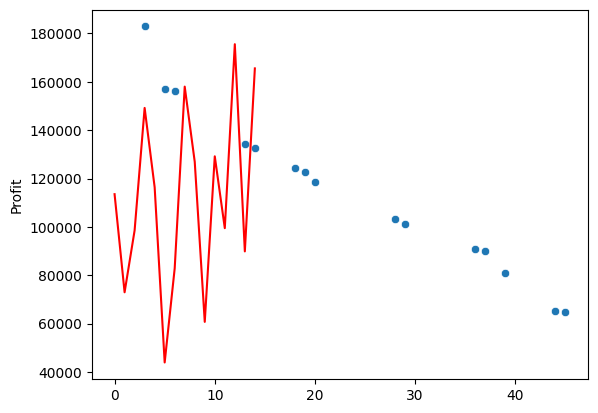

In [ ]:
sns.scatterplot(y_test)
sns.lineplot(y_test_pred, color='r')